# **DRILL: Prepare the Data**

In [134]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [135]:
ny_crime = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

ny_crime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [136]:
# Select datafame columns
ny_crime = ny_crime[['City', 'Population', 'Murder and\rnonnegligent\rmanslaughter', 'Robbery', 'Property\rcrime']]

# Rename columns
ny_crime.columns = ['City', 'Population', 'Murder', 'Robbery', 'Property Crime']

# Remove commas from numeric strings
ny_crime['Population'] = ny_crime.Population.apply(lambda x: x.replace(',', ''))

# Change type to int
ny_crime['Population'] = ny_crime.Population.astype(int)

# Remove commas from numeric strings
ny_crime['Robbery'] = ny_crime.Robbery.apply(lambda x: x.replace(',', ''))

# Change type to int
ny_crime['Robbery'] = ny_crime.Robbery.astype(int)

# Remove commas from numeric strings
ny_crime['Property Crime'] = ny_crime['Property Crime'].apply(lambda x: x.replace(',', ''))

# Change type to int
ny_crime['Property Crime'] = ny_crime['Property Crime'].astype(int)

# Drop null values
ny_crime = ny_crime.dropna()

ny_crime.head()

,City,Population,Murder,Robbery,Property Crime
0,Adams Village,1861,0,0,12
1,Addison Town and Village,2577,0,0,24
2,Akron Village,2846,0,0,16
3,Albany,97956,8,227,4090
4,Albion Village,6388,0,4,223


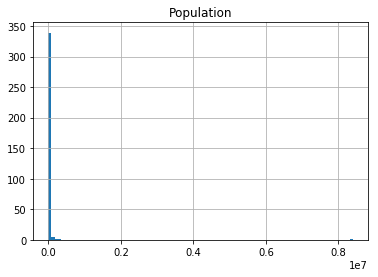

In [137]:
# Plot population distribution
ny_crime['Population'].hist(bins=100)
plt.title('Population')
plt.show()

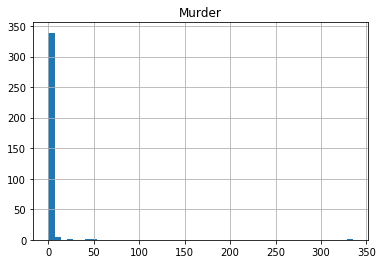

In [138]:
# Plot murder distribution
ny_crime['Murder'].hist(bins=50)
plt.title('Murder')
plt.show()

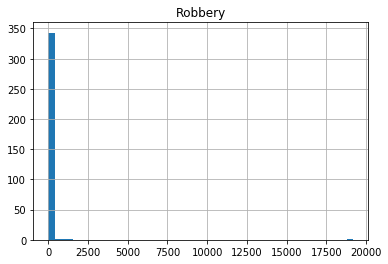

In [139]:
# Plot robbery distribution
ny_crime['Robbery'].hist(bins=50)
plt.title('Robbery')
plt.show()

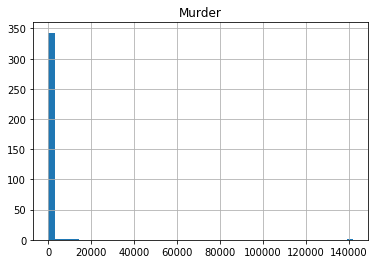

In [140]:
# Plot property crime distribution
ny_crime['Property Crime'].hist(bins=50)
plt.title('Murder')
plt.show()

In [141]:
# Filter out any outliers over two standard deviations above the mean
pop_cutoff = ny_crime['Population'].mean() + 2*ny_crime['Population'].std()
mur_cutoff = ny_crime['Murder'].mean() + 2*ny_crime['Murder'].std()
rob_cutoff = ny_crime['Robbery'].mean() + 2*ny_crime['Robbery'].std()
prop_cutoff = ny_crime['Property Crime'].mean() + 2*ny_crime['Property Crime'].std()

ny_crime['Population'] = ny_crime.Population.map(lambda x: x if x < pop_cutoff else None)
ny_crime['Murder'] = ny_crime.Murder.map(lambda x: x if x < mur_cutoff else None)
ny_crime['Robbery'] = ny_crime.Robbery.map(lambda x: x if x < rob_cutoff else None)
ny_crime['Property Crime'] = ny_crime['Property Crime'].map(lambda x: x if x < prop_cutoff else None)

ny_crime.describe()

,Population,Murder,Robbery,Property Crime
count,347.000000,345.000000,347.000000,347.000000
mean,15956.685879,0.350725,17.867435,385.752161
std,27080.218837,1.587160,94.972492,1034.369072
min,526.000000,0.000000,0.000000,0.000000
25%,2997.000000,0.000000,0.000000,40.000000
50%,7187.000000,0.000000,1.000000,112.000000
75%,18160.500000,0.000000,5.000000,340.500000
max,258789.000000,21.000000,1322.000000,12491.000000


In [142]:
# Create new feature
ny_crime['Population^2'] = ny_crime['Population']**2

# Convert specified columns to boolean
for col in ['Murder', 'Robbery']:
    ny_crime[col] = ny_crime[col] > 0

ny_crime.head()

,City,Population,Murder,Robbery,Property Crime,Population^2
0,Adams Village,1861.0,False,False,12.0,3.463321e+06
1,Addison Town and Village,2577.0,False,False,24.0,6.640929e+06
2,Akron Village,2846.0,False,False,16.0,8.099716e+06
3,Albany,97956.0,True,True,4090.0,9.595378e+09
4,Albion Village,6388.0,False,True,223.0,4.080654e+07
